# Public Resources
##### Liam Brem, Xavier Hilmey, Thomas Tran
##### The Best Group

## Introduction

For our analysis of the various neighborhoods of Pittsburgh, we wanted to asses which neighborhood was the "best" to live in. We wanted to achieve this by looking at each neighborhood's'public resources for its citizens to use.

To approach this, we looked at 3 metrics and analyzed 3 datasets that involved:
* Public Facilities
* Parks
* Police Involvement

We initially had our Public Facilities and Parks picked out; however, we struggled to find a fitting third category. We initially debated incorporating data about prisons or air quality but instead decided to go with police. 

#### Imports - we will use throughout the rest of the code

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
from folium import Choropleth

from geopy.geocoders import Nominatim
from shapely.geometry import Point

---

# Criterion 1: Facilities 🏛️


Facilities are properties owned by the city that are open for public use, an example could be a park bench, pool restrooms, concession stands, etc. Checking how good the neighborhood is based on the quantity of ACTIVE city facilities. In an ideal world, you want to live in a neighborhood that has the most public active facilities for the nicest experience.

Dataset Used: City of Pittsburgh Facilities

Read the facilities file and output the top 5.

In [2]:
facilities = pd.read_csv("facilities.csv")

active_facilities = facilities[facilities['inactive'] == 'f']
hood_counts = active_facilities['neighborhood'].value_counts()

most_hood =  hood_counts.idxmax()
most_count = hood_counts.max()

print("The neighborhood with the most active facilities is " + most_hood + " with " + str(most_count) + " active facilities.")
hood_counts.head()

The neighborhood with the most active facilities is Highland Park with 30 active facilities.


neighborhood
Highland Park          30
Squirrel Hill South    29
Perry North            20
Brookline              19
Strip District         15
Name: count, dtype: int64

It's not surprising that Highland Park is the neighborhood with the most active facilities because it generally a well-off middle class-upper neighborhood.

## Graph

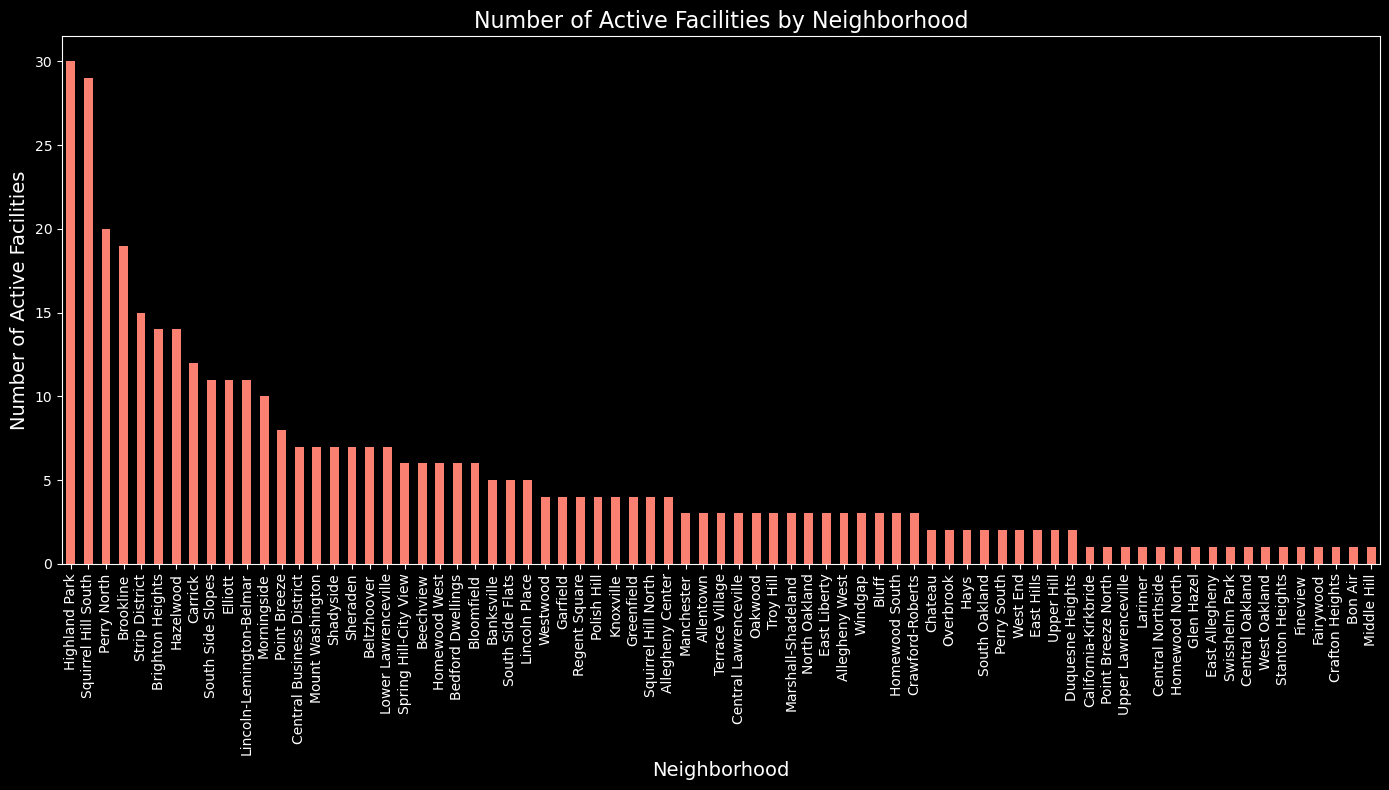

In [3]:
plt.style.use('dark_background')


plt.figure(figsize=(14, 8)) 
hood_counts.plot(kind='bar', color='salmon') 
plt.title('Number of Active Facilities by Neighborhood', fontsize=16)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Number of Active Facilities', fontsize=14)
plt.tight_layout() 
plt.show()

From looking at the graph, it's very logical. Pittsburgh has good, as well as bad neighborhoods, so the severity of how different the amount of facilities for the nicest neighborhood vs the worst neighborhood makes sense.

---

# Criterion 2: Parks 🛝

Our second criteria in determining the best neighborhood is the number of parks per neighborhood. Simply put, the more parks, the more desirable/better it is to live there. 

DataSet Used: Pittsburgh Parks

Sort by number of parks in each neighborhood

In [4]:
parks = pd.read_csv("parks.csv")
# rank each neighborhood by number of parks
neighborhoods = parks['neighborhood'].value_counts()
print(neighborhoods)

neighborhood
East Liberty                 12
Central Business District    10
Beechview                     8
South Side Slopes             7
Point Breeze                  7
                             ..
Hays                          1
Arlington                     1
Stanton Heights               1
Morningside                   1
Squirrel Hill North           1
Name: count, Length: 73, dtype: int64


Create a bar graph for all the neighborhoods using MatPlotLib

## Graph

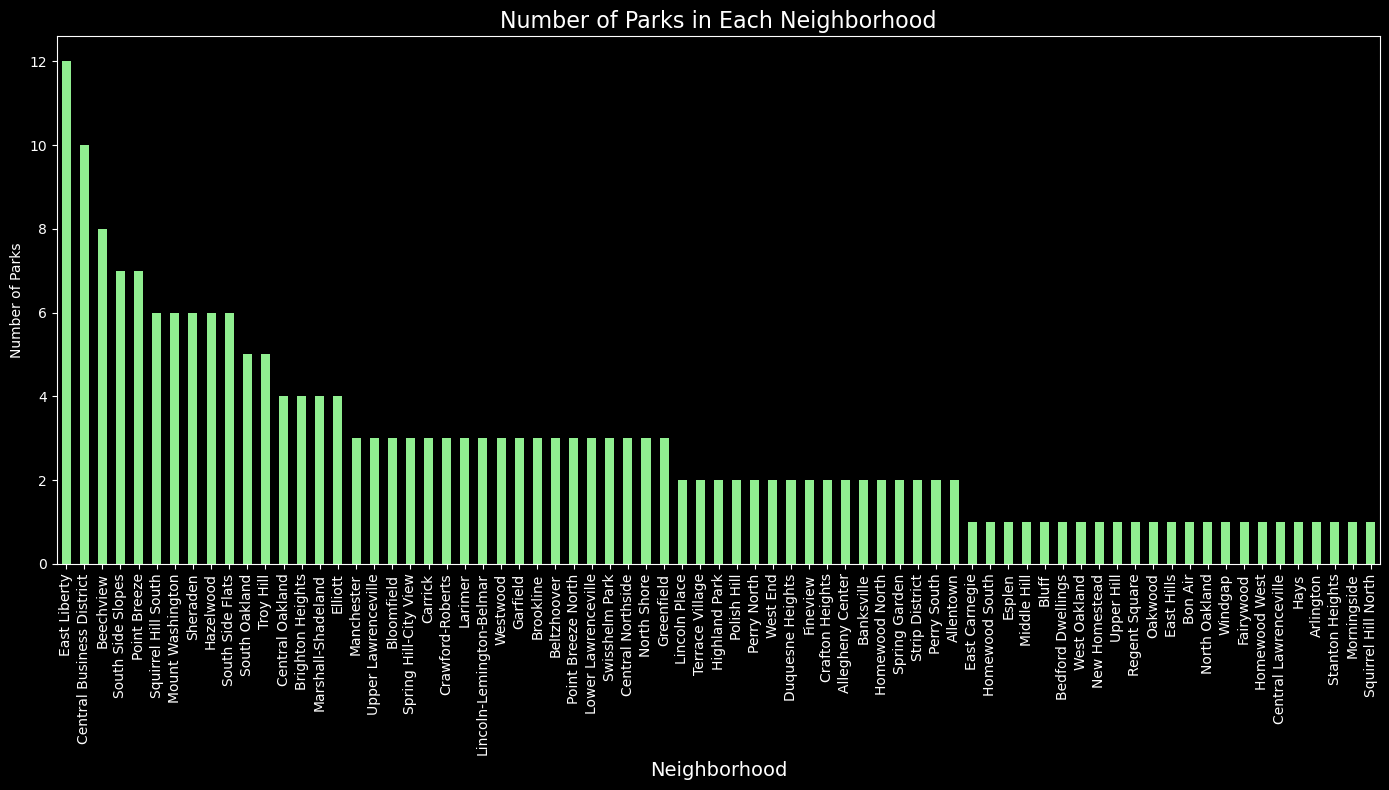

In [5]:
plt.style.use('dark_background')

plt.figure(figsize=(14, 8))
neighborhoods.plot(kind='bar', color='lightgreen')
plt.title('Number of Parks in Each Neighborhood', fontsize=16)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Number of Parks')
plt.tight_layout()
plt.show()


As you can see, East Liberty has the highest number of parks followed by Central Business District and Beechview.

Here we create a map of Pittsburgh with a heatmap of the number of parks in each neighborhood.

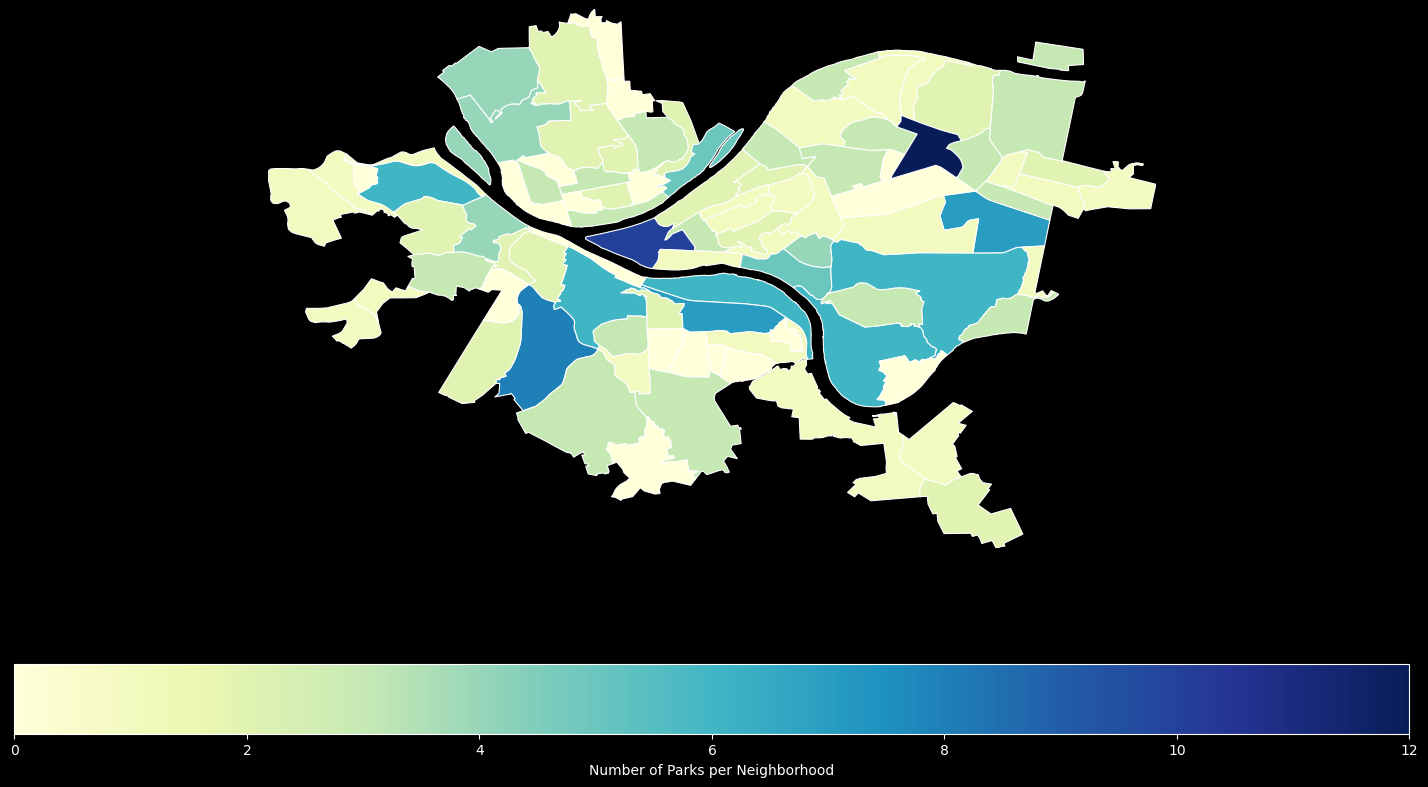

In [12]:
neighborhoods_geo = gpd.read_file('neighborhoods/neighborhoods_new.shp')  
parks = pd.read_csv("parks.csv")

neighborhood_counts = parks['neighborhood'].value_counts().reset_index()
neighborhood_counts.columns = ['neighborhood', 'park_count']

neighborhoods_geo = neighborhoods_geo.merge(neighborhood_counts, how="left", left_on="hood", right_on="neighborhood")
neighborhoods_geo['park_count'] = neighborhoods_geo['park_count'].fillna(0)  # Fill NaNs for neighborhoods with no parks

fig, ax = plt.subplots(1, 1, figsize=(18, 10))


neighborhoods_geo.plot(
    column='park_count',  
    cmap='YlGnBu',  
    linewidth=0.8,  
    edgecolor='white',  #
    legend=True,
    legend_kwds={'label': "Number of Parks per Neighborhood", 'orientation': "horizontal"},
    missing_kwds={"color": "lightgrey", "label": "No parks"}  #
    , ax=ax
)

ax.set_aspect('equal') 

ax.set_xlim(neighborhoods_geo.total_bounds[0], neighborhoods_geo.total_bounds[2])
ax.set_ylim(neighborhoods_geo.total_bounds[1], neighborhoods_geo.total_bounds[3])

ax.set_axis_off()

plt.show()

##### Something interesting is that downtown Pittsburgh has a relatively high amount of parks, despite it being so urbanized. 

##### A seen in the maps above, the neighborhoods receiving the most points are:
* East Liberty
* Central Business District
* Beechview

##### And those receieving the least amount of points are all of the neighborhoods in light yellow with only 1 park


---

# Criterion 3: Police Involvement 🚔

For our final variable, we looked at non-traffice citations. The dataset defines these as "low-level criminal offenses where a law enforcement officer or other authorized official issued a citation in lieu of arrest." This means the neighborhoods with more citations issued have more police involvement (a public good) and are therefore, a better place to live.

Here, we read the csv file and extract the minimum and maximum neighborhood counts.

In [13]:
police = pd.read_csv("crimes.csv")

crime_count = police['NEIGHBORHOOD'].value_counts().reset_index()
crime_count.columns = ['neighborhood', 'total_crimes']

crime_count.index = crime_count.index + 1
crime_count = crime_count.rename_axis("rank")

nameMax = crime_count['neighborhood'].iloc[0]
crimeMax = crime_count['total_crimes'].iloc[0]

print(f"The neighborhood with the most crimes is {nameMax} with a total of {crimeMax} crimes.")
print(crime_count)

The neighborhood with the most crimes is South Side Flats with a total of 3453 crimes.
                   neighborhood  total_crimes
rank                                         
1              South Side Flats          3453
2     Central Business District          2027
3               Central Oakland           665
4                   North Shore           577
5                       Carrick           456
...                         ...           ...
93                    St. Clair             3
94              Mt. Oliver Boro             3
95               Chartiers City             3
96                Outside State             2
97               Outside County             2

[97 rows x 2 columns]


It seems as if there is a direct correlation between the general economic status of a neighborhood and the crime rate of said neighborhood. 

## Graph

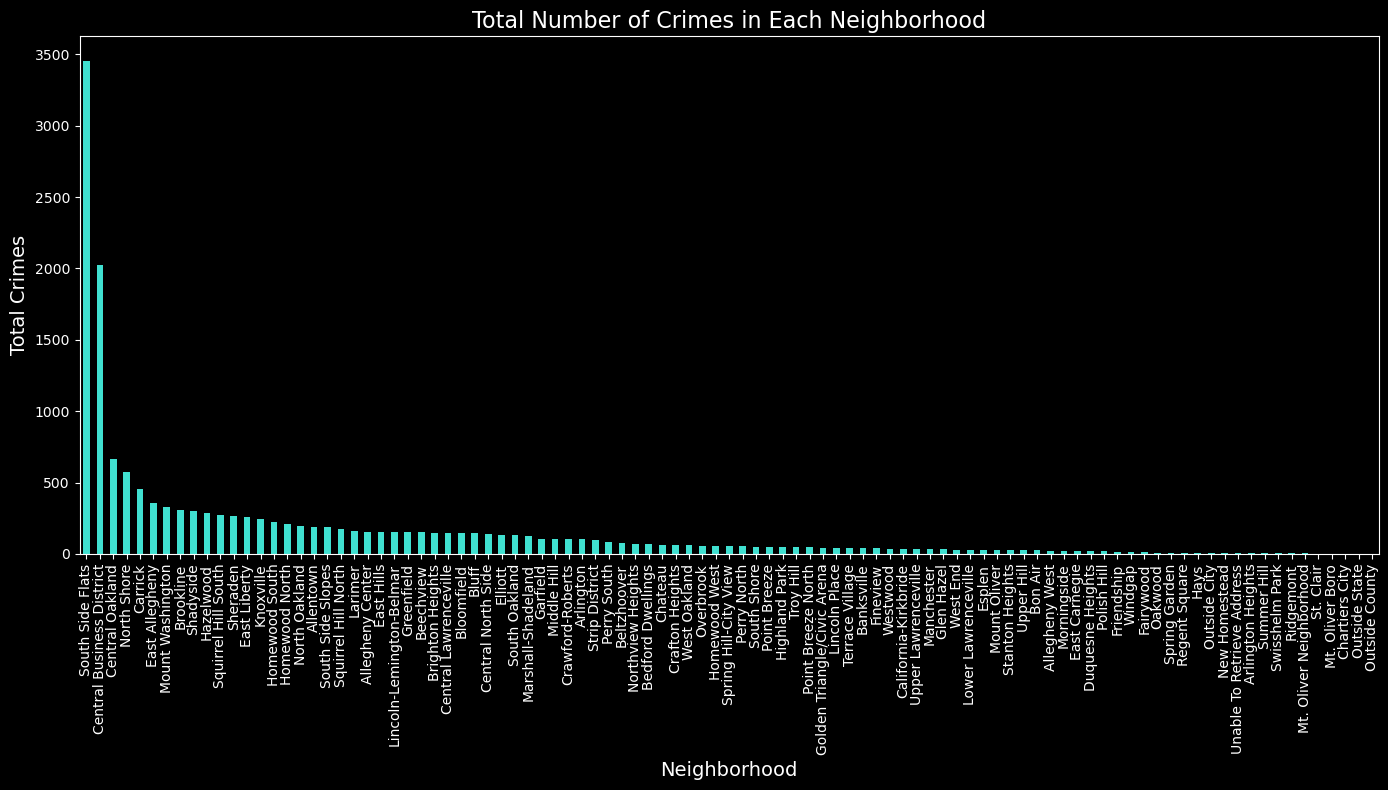

In [8]:
police = pd.read_csv("crimes.csv")

crime_count = police['NEIGHBORHOOD'].value_counts().reset_index()
crime_count.columns = ['neighborhood', 'total_crimes']

crime_count.index = crime_count.index + 1
crime_count = crime_count.rename_axis("rank")

plt.style.use('dark_background')
plt.figure(figsize=(14, 8))

crime_count.set_index('neighborhood')['total_crimes'].plot(kind='bar', color='turquoise')

plt.title('Total Number of Crimes in Each Neighborhood', fontsize=16)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Total Crimes', fontsize=14)
plt.tight_layout()
plt.show()


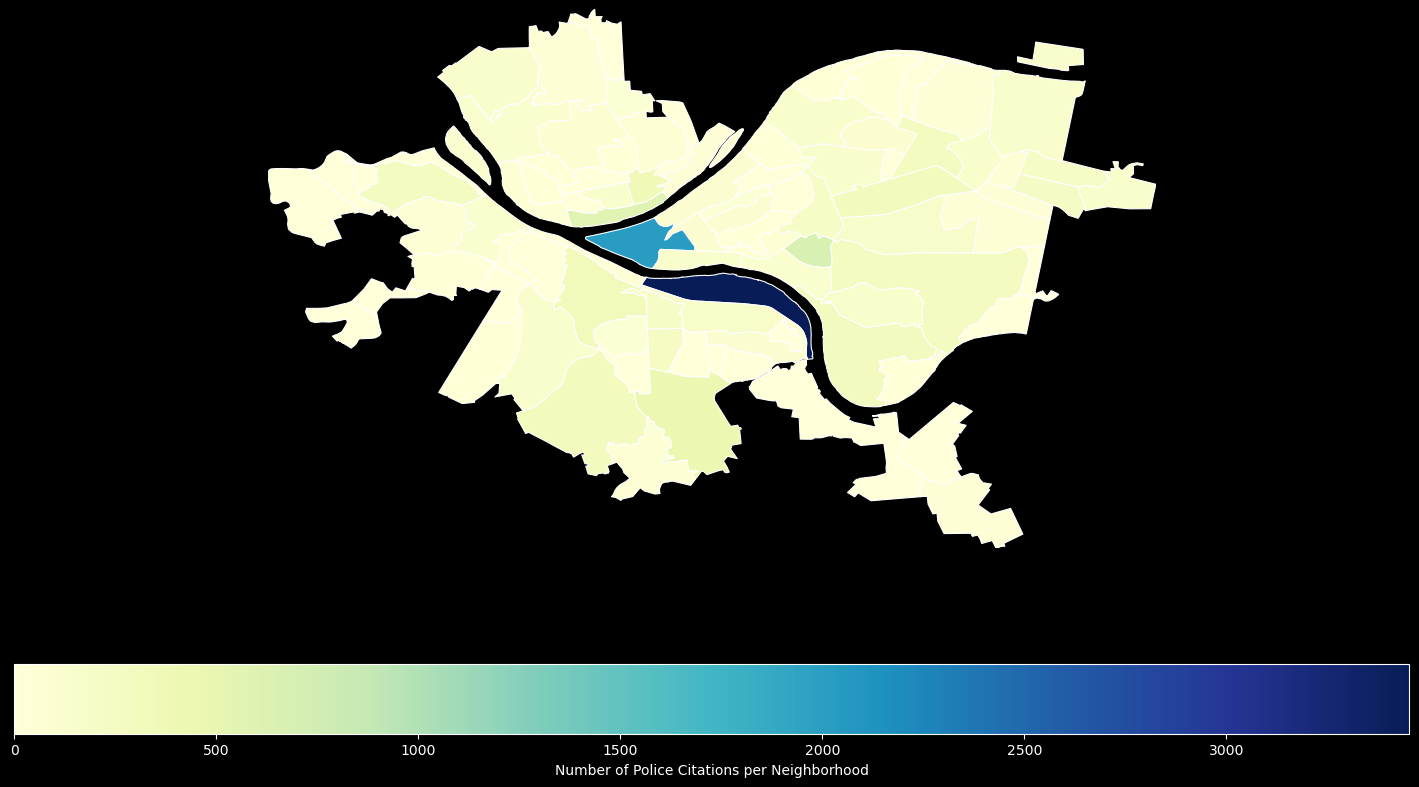

In [9]:
neighborhoods_geo = gpd.read_file('neighborhoods/neighborhoods_new.shp')  
police = pd.read_csv("crimes.csv")

neighborhood_counts = police['NEIGHBORHOOD'].value_counts().reset_index()
neighborhood_counts.columns = ['neighborhood', 'crime_count']

neighborhoods_geo = neighborhoods_geo.merge(neighborhood_counts, how="left", left_on="hood", right_on="neighborhood")
neighborhoods_geo['crime_count'] = neighborhoods_geo['crime_count'].fillna(0)  # Fill NaNs for neighborhoods with no parks

fig, ax = plt.subplots(1, 1, figsize=(18, 10))


neighborhoods_geo.plot(
    column='crime_count',  
    cmap='YlGnBu',  
    linewidth=0.8,  
    edgecolor='white',  #
    legend=True,
    legend_kwds={'label': "Number of Police Citations per Neighborhood", 'orientation': "horizontal"},
    missing_kwds={"color": "lightgrey", "label": "No police"}  #
    , ax=ax
)

ax.set_aspect('equal') 

ax.set_xlim(neighborhoods_geo.total_bounds[0], neighborhoods_geo.total_bounds[2])
ax.set_ylim(neighborhoods_geo.total_bounds[1], neighborhoods_geo.total_bounds[3])

ax.set_axis_off()

plt.show()

From what the graph shows us, the crime is very concentrated in certain areas, while the rest of the neighborhoods are fairly similar in crime rate. South Side Flats has significantly more citations issued than 2nd place Central Business District which has significantly more than the results. 

---

# Totals ⚖️

Here, we combine each of these metrics to determine the overall best neighborhood. 

In order to meaningfully combine the totals, we convert each neighborhood's totals to a percentage of each category so that they're all weighted evenly. We then sum them to determine a winner.

In [10]:
import pandas as pd

neighborhoods = pd.concat([active_facilities['neighborhood'], parks['neighborhood']]).dropna().unique()
neighborhood_data = pd.DataFrame(neighborhoods, columns=['neighborhood'])

neighborhood_data['parksRank'] = neighborhood_data['neighborhood'].apply(lambda x: parks[parks['neighborhood'] == x].shape[0])
neighborhood_data['facilitiesRank'] = neighborhood_data['neighborhood'].apply(lambda x: active_facilities[active_facilities['neighborhood'] == x].shape[0])
neighborhood_data['policeRank'] = neighborhood_data['neighborhood'].apply(lambda x: police[police['NEIGHBORHOOD'] == x].shape[0])

neighborhood_data[['parksRank', 'facilitiesRank', 'policeRank']] = neighborhood_data[['parksRank', 'facilitiesRank', 'policeRank']].fillna(0).astype(int)

neighborhood_data['parksRank_norm'] = neighborhood_data['parksRank'] / neighborhood_data['parksRank'].max()
neighborhood_data['facilitiesRank_norm'] = neighborhood_data['facilitiesRank'] / neighborhood_data['facilitiesRank'].max()
neighborhood_data['policeRank_norm'] = neighborhood_data['policeRank'] / neighborhood_data['policeRank'].max()

neighborhood_data['parksRank'] = neighborhood_data['parksRank_norm']
neighborhood_data['facilitiesRank'] = neighborhood_data['facilitiesRank_norm']
neighborhood_data['policeRank'] = neighborhood_data['policeRank_norm']

neighborhood_data['totalRank'] = (neighborhood_data['parksRank_norm'] + neighborhood_data['facilitiesRank_norm'] + neighborhood_data['policeRank_norm'])

neighborhood_data_sorted = neighborhood_data.sort_values(by='totalRank', ascending=False)

print(neighborhood_data_sorted[['neighborhood', 'totalRank', 'parksRank', 'facilitiesRank', 'policeRank']].head())
print(neighborhood_data_sorted[['neighborhood', 'totalRank', 'parksRank', 'facilitiesRank', 'policeRank']].tail())

                 neighborhood  totalRank  parksRank  facilitiesRank  \
5            South Side Flats   1.666667   0.500000        0.166667   
17  Central Business District   1.653692   0.833333        0.233333   
43        Squirrel Hill South   1.545439   0.500000        0.966667   
7               Highland Park   1.181436   0.166667        1.000000   
21               East Liberty   1.174718   1.000000        0.100000   

    policeRank  
5     1.000000  
17    0.587026  
43    0.078772  
7     0.014770  
21    0.074718  
            neighborhood  totalRank  parksRank  facilitiesRank  policeRank
66               Chateau   0.085780   0.000000        0.066667    0.019114
80         New Homestead   0.085650   0.083333        0.000000    0.002317
65             Overbrook   0.083464   0.000000        0.066667    0.016797
67  California-Kirkbride   0.043469   0.000000        0.033333    0.010136
49            Glen Hazel   0.042890   0.000000        0.033333    0.009557


### The combined graph

Here we use a "tiered" bar chart to effectively display all of our combined data.

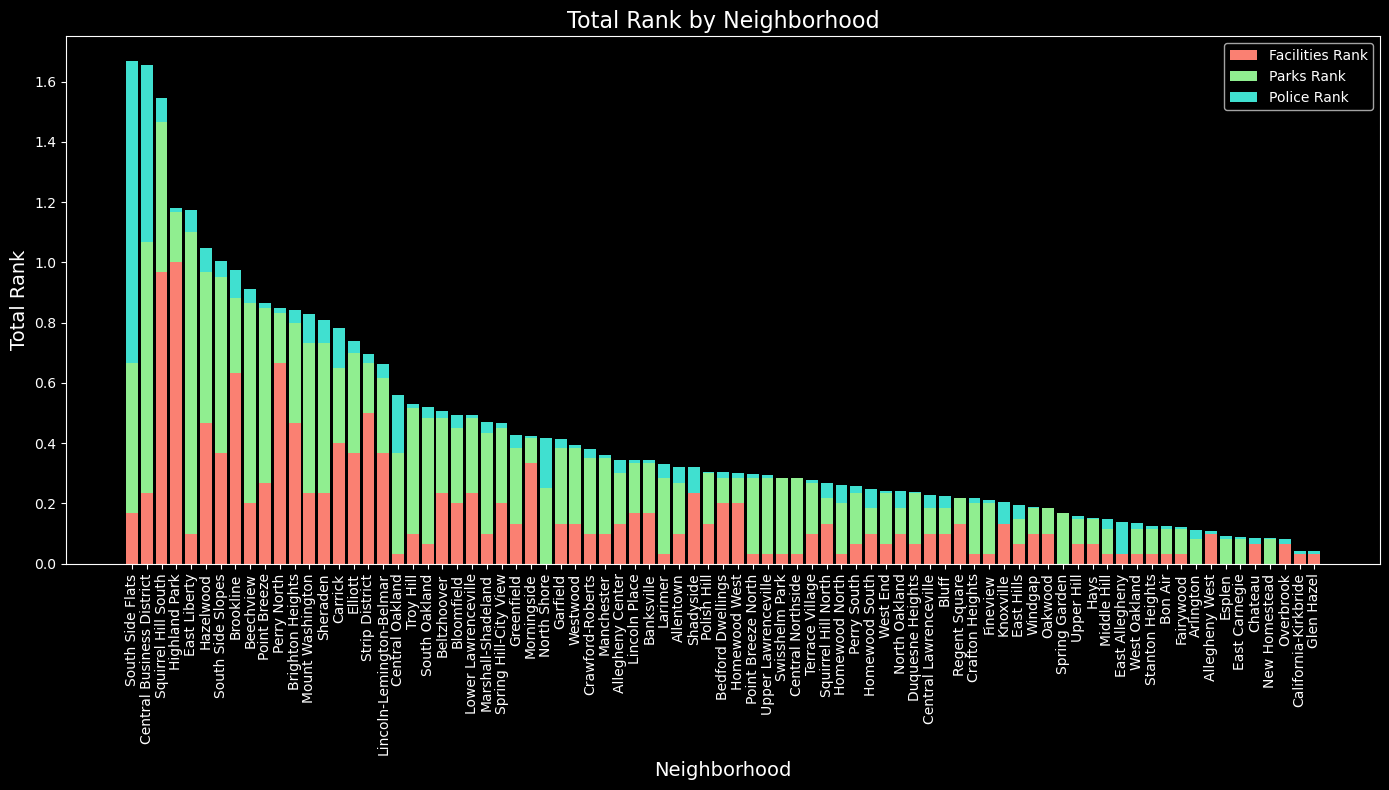

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize=(14, 8))

plt.bar(neighborhood_data_sorted['neighborhood'], neighborhood_data_sorted['facilitiesRank_norm'], label='Facilities Rank', color='salmon')
plt.bar(neighborhood_data_sorted['neighborhood'], neighborhood_data_sorted['parksRank_norm'], bottom=neighborhood_data_sorted['facilitiesRank'], label='Parks Rank', color='lightgreen')
plt.bar(neighborhood_data_sorted['neighborhood'], neighborhood_data_sorted['policeRank_norm'], bottom=neighborhood_data_sorted['facilitiesRank'] + neighborhood_data_sorted['parksRank'], label='Police Rank', color='turquoise')


plt.title('Total Rank by Neighborhood', fontsize=16)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('Total Rank', fontsize=14)
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

### And our winner is 🥁

##### South Side Flats !!!

### Conclusion

After analyzing our Facilities, Parks, and Police Involvement metrics, we have decided that **South Side Flats** is the best neighborhood in Pittsburgh. As you can see, the police data has a large effect on the totals, allowing south side flats to rank so high. Without the police data, it would be located around the 75th percentile, and Squirrell Hill South would be the clear winner. 

Conversely **Glen Hazel** was calculated to be our worst neighborhood. This makes sense in terms of our metrics due to it being relatively small with a sub 1,000 person population. 

In order to get a more accurate ranking, many datasets would need to be compiled on top of one another, each with their own subjective weight. Because of this, there is no "correct" way to calculate the best neighborhood.

For this project, we used python libraries such as Pandas, Numpy, and Geopandas for data analysis and visualization. After sorting and scaling all our metrics, we created a percentage for each metric and then took the sum of all three. The sum is represented in our final bar graph, which displays the **facility rank** in red, **park rank** in green, and **police rank** in blue. It is clear that South Side Flats excels in providing a balanced combination of public services such as facilities, parks, and protection.